# 

# Code for automatically cropping images 

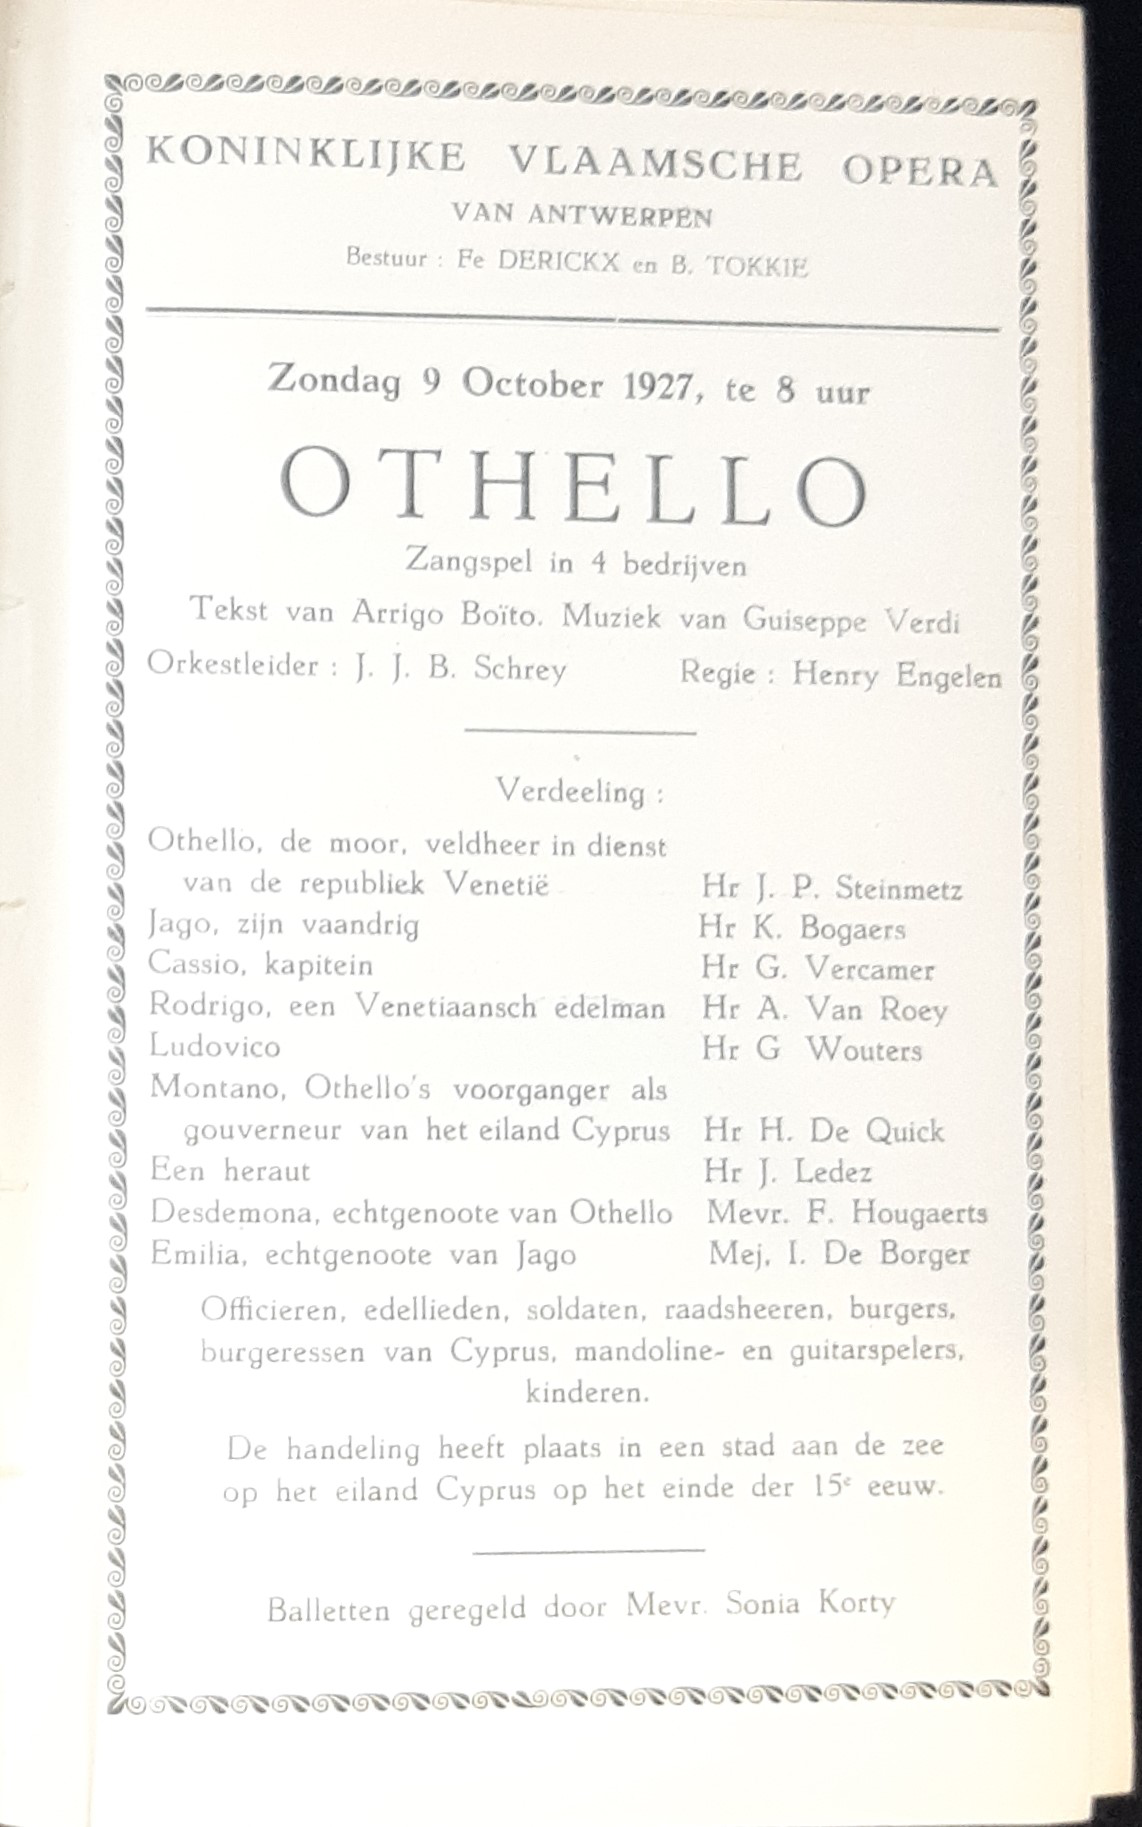

In [14]:
from PIL import Image
import image
import numpy as np

image=Image.open(r"..\..\Primair\1927-1928\1927-1928_00087-20220208_130550.jpg")
image.load()

image_data = np.asarray(image)
image_data_bw = image_data.max(axis=2)
non_empty_columns = np.where(image_data_bw.max(axis=0)>0)[0]
non_empty_rows = np.where(image_data_bw.max(axis=1)>0)[0]
cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

image_data_new = image_data[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]

new_image = Image.fromarray(image_data_new)
new_image

In [15]:
import cv2
import numpy as np
import image
import os

# test foto
img = cv2.imread(r'..\..\Primair\1927-1928\1927-1928_00087-20220208_130550.jpg')

# get color bounds of white region
lower =(180,180,180) # lower bound for each channel
upper = (255,255,255) # upper bound for each channel
threshold = cv2.inRange(img, lower, upper)

# get the largest contour
contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# get bounding box
x,y,w,h = cv2.boundingRect(big_contour)
print(x,y,w,h)

# crop the image at the bounds
crop = img[y:y+h, x:x+w]

# display it
cv2.imshow("crop", crop)
cv2.waitKey(0)



0 0 1133 1827


-1

In [39]:
#It seems to work for individual images.
#now, throw it in a for-loop so it can handle all images in a collection.

directory = 'C:/Users/monaa/Dropbox/Thesis/Primair/1930-1931'

for img in os.listdir(directory):
    
    img = cv2.imread('C:/Users/monaa/Dropbox/Thesis/Primair/1930-1931/'+str(img))
    
    
    lower = (180,180,180)
    upper = (255,255,255)

    threshold = cv2.inRange(img, lower, upper)

    contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    big_contour = max(contours, key=cv2.contourArea)


    x,y,w,h = cv2.boundingRect(big_contour)

    crop = img[y:y+h, x:x+w]

    # Make sure that it's saved under a new filename so that it doesn't override the original image in case of errors.
    cv2.imwrite('c'+str(img)+'.jpg', threshold)
    cv2.imwrite('c'+str(img)+'.jpg', crop)
    